# Data analysis for Test Station 1

******************
## Supraja Gurajala  (Phd)

## 2019-08-07




## Import require library

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import mysql.connector

from scipy.signal import savgol_filter   # smooth the data

#plt.style.use('seaborn-white')
plt.style.use('ggplot')

## Reading CSV data

*******************************************

In [25]:
pdr=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/PDR_1.csv')
grimm=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/grimm1.csv')
cpc=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/CPC2.csv')
a3=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon3.csv')
a9=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon9.csv')
a12=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon12.csv')
a15=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon15.csv')
a17=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon17.csv')
a37=pd.read_csv('/Users/nuera/Google Drive/Me/Work shop/Station1/argon37.csv')

## Change or Format the header of each data


*******************************************

In [26]:
pdr.columns = ["pm2.5","Temp","RH","AP","Flag","Time","Date"]
pdr.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date
0,7.94,20.1,62,752,0,14:11:59,2-Aug-19
1,6.02,20.1,62,754,0,14:12:00,2-Aug-19
2,6.17,20.1,62,754,0,14:12:01,2-Aug-19
3,5.72,20.1,62,754,0,14:12:02,2-Aug-19
4,4.80,20.1,62,754,0,14:12:03,2-Aug-19


In [27]:
pdr["Date"] = pd.to_datetime(pdr["Date"])
pdr["Time"] = pd.to_timedelta(pdr["Time"])
pdr["DateTime"] = pdr["Date"] + pdr["Time"]
#pdr["DateTime"] = pdr["DateTime"] + timedelta(hours=1,minutes=6)
pdr.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date,DateTime
0,7.94,20.1,62,752,0,14:11:59,2019-08-02,2019-08-02 14:11:59
1,6.02,20.1,62,754,0,14:12:00,2019-08-02,2019-08-02 14:12:00
2,6.17,20.1,62,754,0,14:12:01,2019-08-02,2019-08-02 14:12:01
3,5.72,20.1,62,754,0,14:12:02,2019-08-02,2019-08-02 14:12:02
4,4.80,20.1,62,754,0,14:12:03,2019-08-02,2019-08-02 14:12:03


In [28]:
grimm.columns = ["DateTime","id","0.3","0.4","0.5","0.65","0.8","1.0","1.6","2","3","4","5","7.5","10","15","20","nan","pm2.5","pm10"]
cpc.columns = ["DateTime","id","pn"]
a37.columns=["DateTime","id","pm1.0","pm2.5","pm10","0.3um","0.5um","1.0um","2.5um","5.0um","10um","Shinyei","Temp","RH"]
a15.columns = ["DateTime","id","Shinyei","Temp","RH"]
a17.columns = ["DateTime","id","Shinyei","Temp","RH"]
a12.columns = ["DateTime","id","pm2.5","pm10","Temp","RH"]
a9.columns = ["DateTime","id","pm2.5","pm10","Temp","RH"]
a3.columns=["DateTime","id","pm1.0","pm2.5","pm10","0.3um","0.5um","1.0um","2.5um","5.0um","10um","Temp","RH"]


## Format your data's time and chosse your test time or the time you interest


*******************************************

In [29]:
a3=a3.sort_values('id')
a9=a9.sort_values('id')
a12=a12.sort_values('id')
a17=a17.sort_values('id')
a15=a15.sort_values('id')
a37=a37.sort_values('id')
cpc=cpc.sort_values('id')
grimm=grimm.sort_values('id')


a3['DateTime'] = pd.to_datetime(a3['DateTime'])
a9['DateTime'] = pd.to_datetime(a9['DateTime'])
a12['DateTime'] = pd.to_datetime(a12['DateTime'])
a17['DateTime'] = pd.to_datetime(a17['DateTime'])
a15['DateTime'] = pd.to_datetime(a15['DateTime'])
a37['DateTime'] = pd.to_datetime(a37['DateTime'])
cpc['DateTime'] = pd.to_datetime(cpc['DateTime'])
grimm['DateTime'] = pd.to_datetime(grimm['DateTime'])


pdr.index=pdr['DateTime']
grimm.index=grimm['DateTime']
cpc.index=cpc['DateTime']
a3.index=a3['DateTime']
a9.index=a9['DateTime']
a12.index=a12['DateTime']
a17.index=a17['DateTime']
a15.index=a15['DateTime']
a37.index=a37['DateTime']


pdr=pdr['2019-08-02 16:22:01':'2019-08-02 21:21:00']
grimm=grimm['2019-08-02 16:22:01':'2019-08-02 21:01:00']
cpc=cpc['2019-08-02 16:22:01':'2019-08-02 21:21:00']
a3=a3['2019-08-02 16:12:01':'2019-08-02 21:21:00']
a12=a12['2019-08-02 16:12:01':'2019-08-02 21:21:00']
a17=a17['2019-08-02 16:12:01':'2019-08-02 21:21:00']
a9=a9['2019-08-02 16:22:01':'2019-08-02 21:01:00']
a15=a15['2019-08-02 16:12:01':'2019-08-02 21:21:00']
a37=a37['2019-08-02 16:12:01':'2019-08-02 21:21:00']


In [30]:
grimms=grimm['pm2.5'].resample('10Min', how='mean')
a9s=a9['pm2.5'].resample('10Min', how='mean')


C:\Users\nuera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
C:\Users\nuera\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


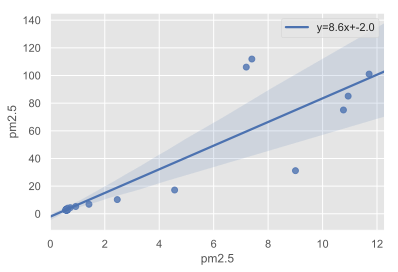

In [33]:
#sns.regplot(grimms, a9s)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(grimms, a9s)

ax = sns.regplot(grimms, a9s, color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

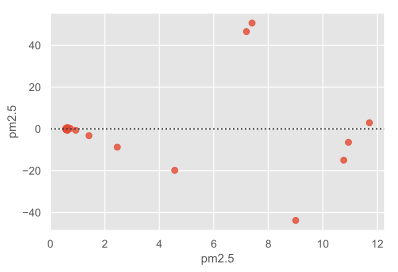

In [32]:
sns.residplot(grimms, a9s)

## Time series plot and compare with CPC

### Note: CPC is reading Number concentrations

C:\Users\nuera\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


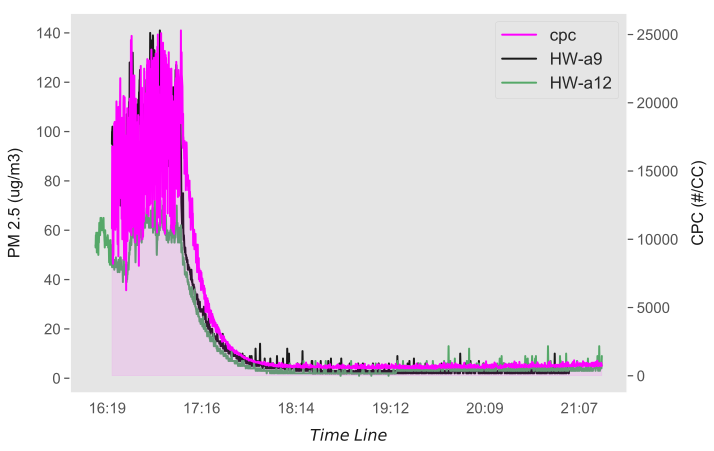

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(cpc['DateTime'],cpc['pn'], color='magenta',linewidth=2,label='cpc')
lns2=ax1.plot(a9['DateTime'],a9['pm2.5'], color='k',linewidth=2,label='HW-a9')
lns3=ax1.plot(a12['DateTime'],a12['pm2.5'], color='g',linewidth=2,label='HW-a12')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('CPC (#/CC)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

ax2.fill_between(cpc['DateTime'], cpc['pn'],color='magenta',alpha=.1)


myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

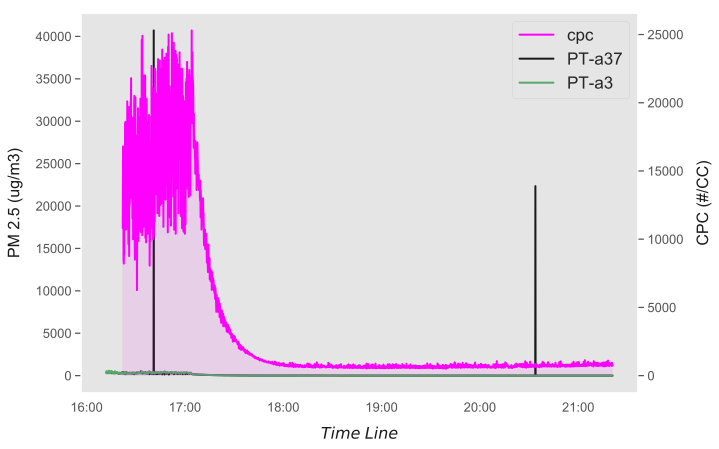

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(cpc['DateTime'],cpc['pn'], color='magenta',linewidth=2,label='cpc')
lns2=ax1.plot(a37['DateTime'],a37['pm2.5'], color='k',linewidth=2,label='PT-a37')
lns3=ax1.plot(a3['DateTime'],a3['pm2.5'], color='g',linewidth=2,label='PT-a3')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('CPC (#/CC)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

ax2.fill_between(cpc['DateTime'], cpc['pn'],color='magenta',alpha=.1)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

## Remove outlier values by data distruibutions

The a37's ditruibution before doing changes:

[(0, 42753.12581142822)]

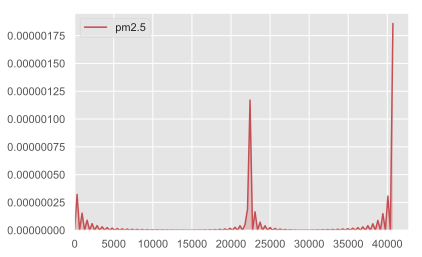

In [13]:
ax = sns.kdeplot(a37['pm2.5'], shade=True, color="r")
ax.set(xlim=(0, None))

In [14]:
q = a37["pm2.5"].quantile(0.999)
a37=a37[a37["pm2.5"] < q]


[(0, 497.5771729476704)]

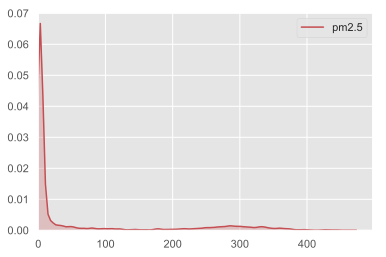

In [15]:
ax = sns.kdeplot(a37['pm2.5'], shade=True, color="r")
ax.set(xlim=(0, None))

In [16]:
grimm['0.3n']=savgol_filter(grimm['0.3'], 97, 1)


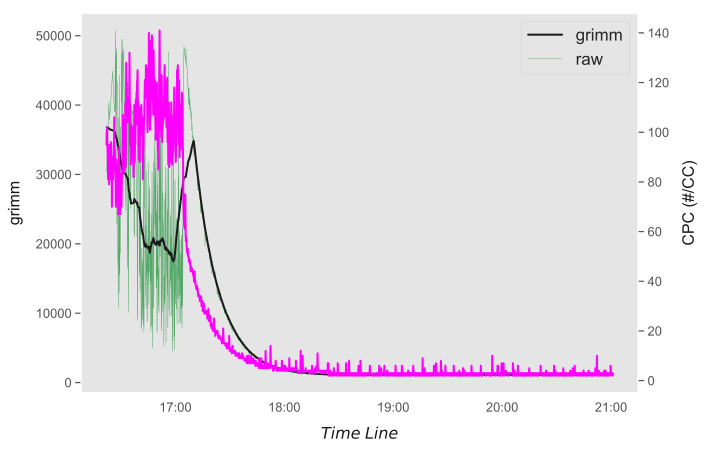

In [17]:


fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(a9['DateTime'],a9['pm2.5'], color='magenta',linewidth=2,label='cpc')
lns3=ax1.plot(grimm['DateTime'],grimm['0.3'], color='g',linewidth=0.5,label='raw')
lns2=ax1.plot(grimm['DateTime'],grimm['0.3n'], color='k',linewidth=2,label='grimm')




lns = lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('grimm',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('CPC (#/CC)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [ ]:
a=((grimm['0.3']-grimm['0.4'])/10)*0.3*0.3*0.3

a

## Time series plot and compare with PDR



In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(pdr['DateTime'],pdr['pm2.5'], color='red',linewidth=2,label='PDR')
lns2=ax1.plot(a9['DateTime'],a9['pm2.5'], color='k',linewidth=2,label='HW-a9')
lns3=ax1.plot(a12['DateTime'],a12['pm2.5'], color='g',linewidth=2,label='HW-a12')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Honeywell PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('PDR PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

ax2.fill_between(pdr['DateTime'], pdr['pm2.5'],color='red',alpha=.1)


myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(pdr['DateTime'],pdr['pm2.5'], color='red',linewidth=2,label='PDR')
lns2=ax1.plot(a37['DateTime'],a37['pm2.5'], color='k',linewidth=2,label='PT-a37')
lns3=ax1.plot(a3['DateTime'],a3['pm2.5'], color='g',linewidth=2,label='PT-a3')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Plantower PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('PDR PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

ax2.fill_between(pdr['DateTime'], pdr['pm2.5'],color='red',alpha=.1)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

## Time series plot and compare with PDR



In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(grimm['DateTime'],grimm['pm2.5'], color='yellow',linewidth=2,label='Grimm')
lns2=ax1.plot(a9['DateTime'],a9['pm2.5'], color='k',linewidth=2,label='HW-a9')
lns3=ax1.plot(a12['DateTime'],a12['pm2.5'], color='g',linewidth=2,label='HW-a12')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Honeywell PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('Grimm PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

ax2.fill_between(grimm['DateTime'], grimm['pm2.5'],color='yellow',alpha=.1)


myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(grimm['DateTime'],grimm['pm2.5'], color='red',linewidth=2,label='PDR')
lns2=ax1.plot(a37['DateTime'],a37['pm2.5'], color='k',linewidth=2,label='PT-a37')
lns3=ax1.plot(a3['DateTime'],a3['pm2.5'], color='g',linewidth=2,label='PT-a3')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Plantower PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('Grimm PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

ax2.fill_between(grimm['DateTime'], grimm['pm2.5'],color='yellow',alpha=.1)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax2.plot(grimm['DateTime'],grimm['0.3'], color='red',linewidth=2,label='PDR')
lns2=ax1.plot(a37['DateTime'],a37['pm2.5'], color='k',linewidth=2,label='PT-a37')
lns3=ax1.plot(a3['DateTime'],a3['pm2.5'], color='g',linewidth=2,label='PT-a3')




lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Plantower PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('grimm PN 0.3',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

ax2.fill_between(grimm['DateTime'], grimm['pm2.5'],color='yellow',alpha=.1)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)